<a href="https://colab.research.google.com/github/jakarthaa/Deep-learning/blob/main/Minsal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np
import seaborn as sb
#cargar los datos de exel
#se recomienda  cambiar el nombre de exel para un mejor manejo
datos= pd.read_excel('cefan.xls')
#se muestran los datos en este caso los 5 primeros
datos.head()



,Clasificación Beneficiario Fonasa,Edad Expresada en Años
0,B,44
1,B,55
2,B,59
3,A,0
4,B,45


In [94]:
#cuenta  la cantida  de personas  con  la edad aparente
#ejemplo hay  464 personas con la edad de 1 año
datos["Edad Expresada en Años"].value_counts()
#la cantida que pertenecen a cada grupo en fonasa
datos["Clasificación Beneficiario Fonasa"].value_counts()

Clasificación Beneficiario Fonasa
B     7745
A     7543
C     2533
D     2116
Name: count, dtype: int64

In [77]:
#muestra  diferente informacion de los resultados calculables
#en este caso la edades
datos.describe()

,Edad Expresada en Años
count,20185.000000
mean,38.208769
std,24.024828
min,0.000000
25%,16.000000
50%,42.000000
75%,58.000000
max,96.000000


array([[<Axes: title={'center': 'Edad Expresada en Años'}>]], dtype=object)

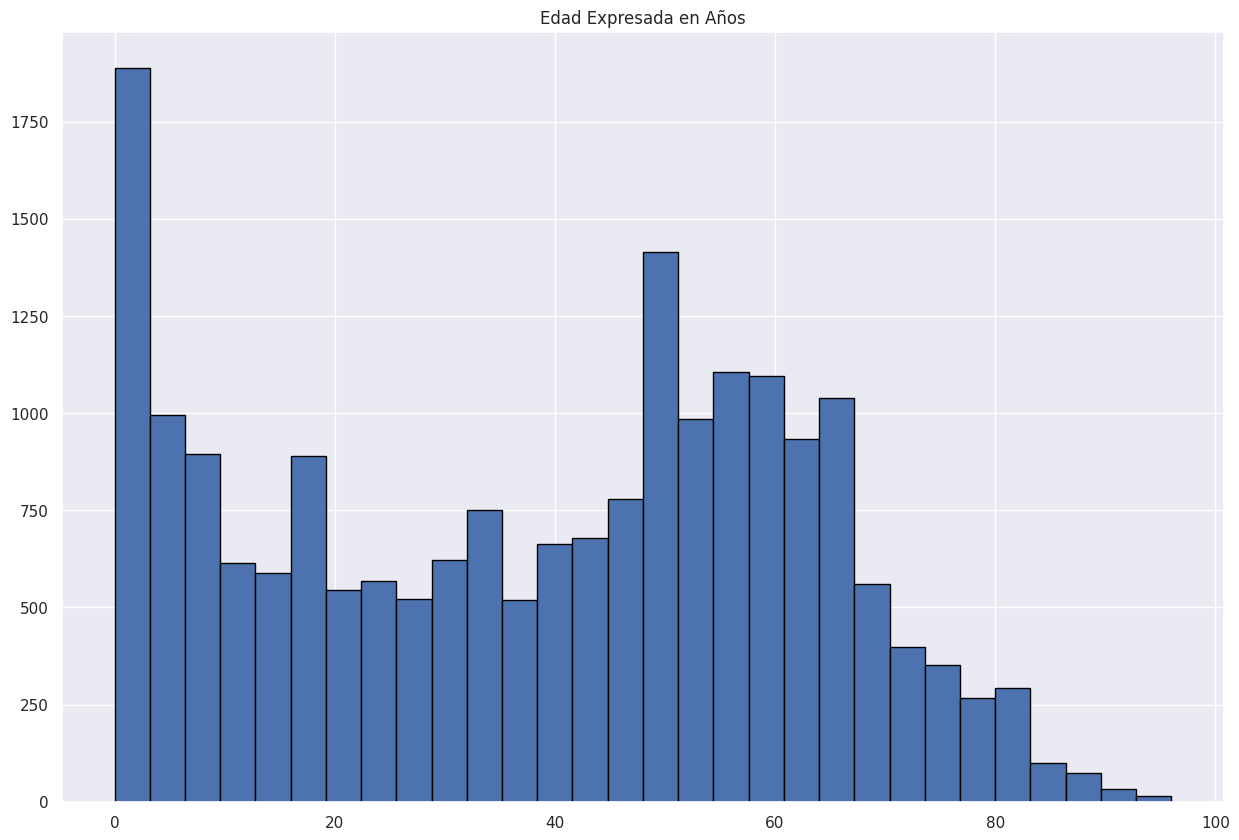

In [78]:
#datos de edades
datos.hist(figsize=(15,10), bins=30, edgecolor="black"  )


In [79]:
#le damos categorizacion  y que regrese forzadamente tipo de enteros
dummies= pd.get_dummies(datos["Clasificación Beneficiario Fonasa"], dtype=int)
# con join se agregan la categorizacion de fonasa  por grupos A B C D
datos=datos.join(dummies)
datos.head()


,Clasificación Beneficiario Fonasa,Edad Expresada en Años,A,B,C,D
0,B,44,0,1,0,0
1,B,55,0,1,0,0
2,B,59,0,1,0,0
3,A,0,1,0,0,0
4,B,45,0,1,0,0


In [80]:
#eliminamos la  clasificacion de beneficiarios de fonasa ya que sale su categorizacion al final
datos.drop("Clasificación Beneficiario Fonasa", axis=1, inplace=True)
datos.head()

,Edad Expresada en Años,A,B,C,D
0,44,0,1,0,0
1,55,0,1,0,0
2,59,0,1,0,0
3,0,1,0,0,0
4,45,0,1,0,0


In [32]:
datos.head()

,Edad Expresada en Años,A,B,C,D
0,44,0,1,0,0
1,55,0,1,0,0
2,59,0,1,0,0
3,0,1,0,0,0
4,45,0,1,0,0


In [81]:
#analizis de nuevas caracteristicas
# correlaciones de datos
datos.corr()


,Edad Expresada en Años,A,B,C,D
Edad Expresada en Años,1.000000,-0.310109,0.314650,0.027652,-0.020146
A,-0.310109,1.000000,-0.609487,-0.292607,-0.264335
B,0.314650,-0.609487,1.000000,-0.298897,-0.270017
C,0.027652,-0.292607,-0.298897,1.000000,-0.129632
D,-0.020146,-0.264335,-0.270017,-0.129632,1.000000


<Axes: >

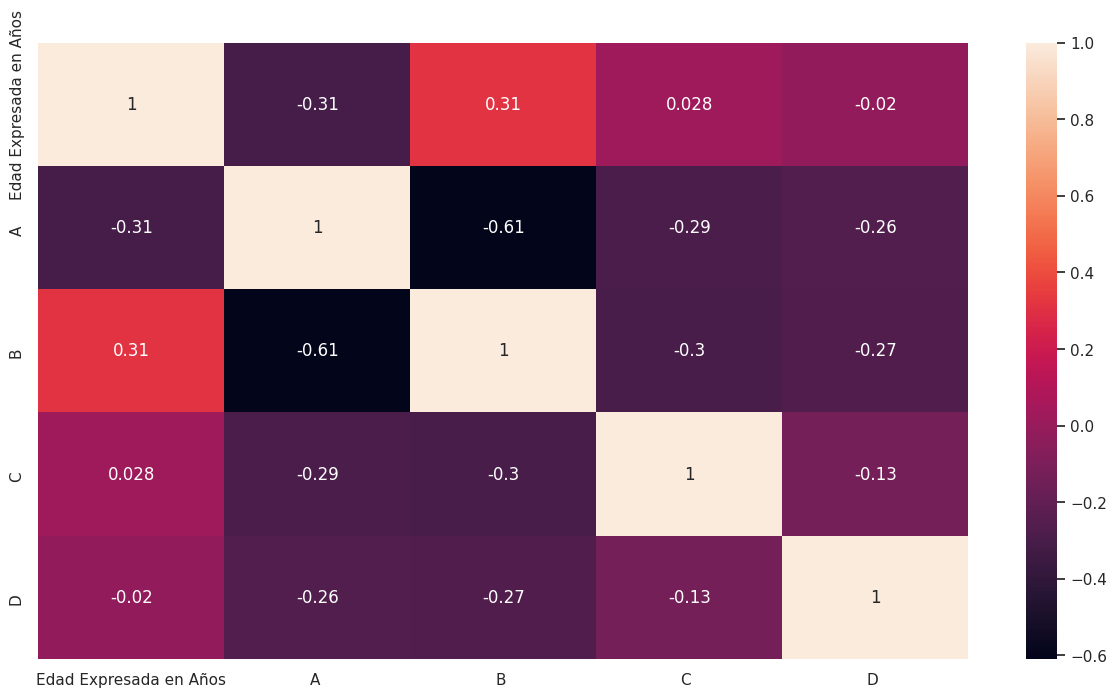

In [37]:
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(datos.corr(), annot=True)
#se muestra la relacion que hay entre todos los datos
#en este caso edad esxpresada sale 1 por que se relaciona del eje x e y
# en este caso nos enfocaremos de los numeros  positivos
#ya que podremos ver en lo que afecta al ingresar datos nuevos  en la variacion
# ejemplo si ingreo un nuevo dato en grupo D afectara de firma diminutiva
#encaso en el grupo

In [38]:
datos.corr()["Edad Expresada en Años"].sort_values(ascending=False)

Edad Expresada en Años    1.000000
B                         0.314650
C                         0.027652
D                        -0.020146
A                        -0.310109
Name: Edad Expresada en Años, dtype: float64

<Axes: xlabel='Edad Expresada en Años', ylabel='Clasificación Beneficiario Fonasa'>

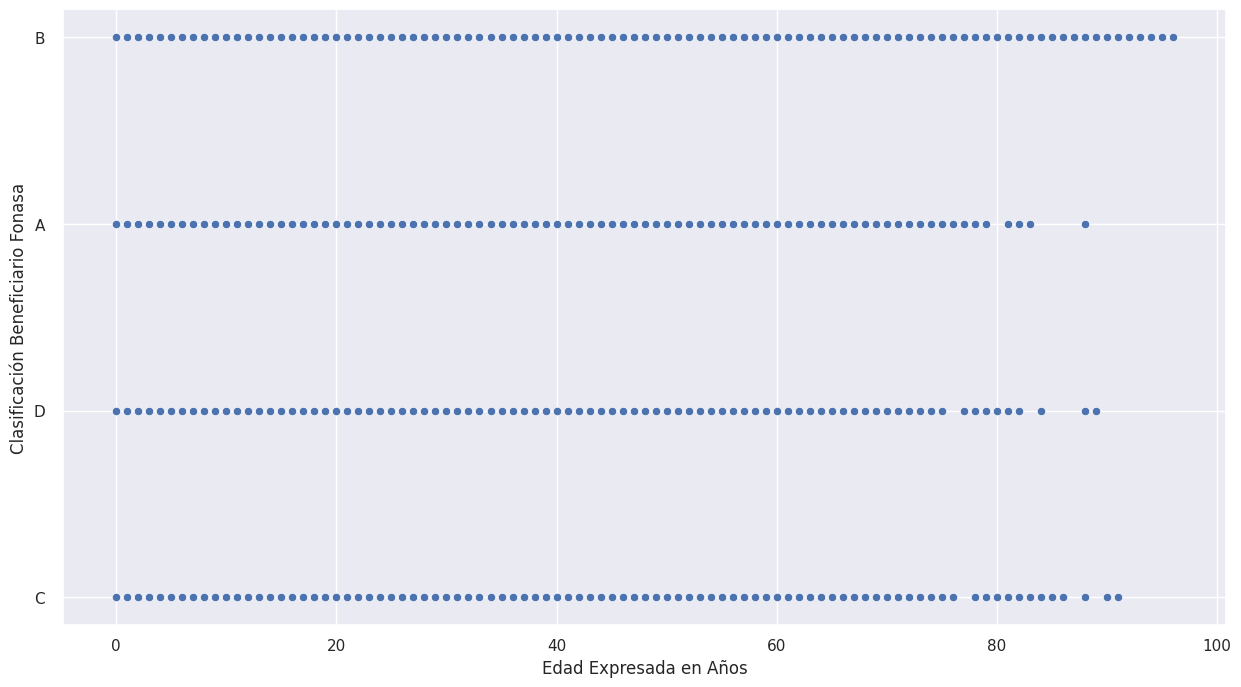

In [41]:
sb.scatterplot(x=datos["Edad Expresada en Años"], y=datos["Clasificación Beneficiario Fonasa"])

In [95]:
x = datos.drop("Clasificación Beneficiario Fonasa", axis=1)
y = datos["Clasificación Beneficiario Fonasa"]

In [63]:
#separar los datos en 2 partes conjunto de entrenamiento y uno de pruebas
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer  # Import SimpleImputer

regresion = LinearRegression()
ohe = OneHotEncoder()
# Always fit the model, regardless of whether 'Clasificación Beneficiario Fonasa' is present
if 'Clasificación Beneficiario Fonasa' in x_train.columns:
    column_to_encode = 'Clasificación Beneficiario Fonasa'  # Example
    x_train_encoded = ohe.fit_transform(x_train[[column_to_encode]])
    x_test_encoded = ohe.transform(x_test[[column_to_encode]])

    # Convert the encoded sparse matrices to dense arrays
    x_train_encoded = x_train_encoded.toarray()
    x_test_encoded = x_test_encoded.toarray()

    # Replace the original column with the encoded columns in x_train and x_test
    x_train = x_train.drop(column_to_encode, axis=1)
    x_train = pd.concat([x_train, pd.DataFrame(x_train_encoded)], axis=1)

    x_test = x_test.drop(column_to_encode, axis=1)
    x_test = pd.concat([x_test, pd.DataFrame(x_test_encoded)], axis=1)

    # Impute missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with your desired strategy
    x_train = imputer.fit_transform(x_train)
    x_test = imputer.transform(x_test)

# Fit the model outside the conditional block
regresion.fit(x_train, y_train)  # Now the model is trained

# Now you can make predictions:
predciones = regresion.predict(x_test)

In [99]:
predciones = regresion.predict(x_test)
comprar ={"Predicones": predciones, "valor real" : y_test}
pd.DataFrame(comprar)

,Predicones,valor real
3375,16.0,16
7499,12.0,12
14619,5.0,5
6377,31.0,31
14197,14.0,14
...,...,...
7603,27.0,27
2501,72.0,72
17264,66.0,66
16428,9.0,9


In [100]:
datos.head()
print(regresion.score(x_train,y_train))
print(regresion.score(x_test,y_test))


1.0
1.0
